## Logistic regression  

The logistic function:  

$$N(x) = \frac{K}{1 + \exp\left(-aK(x - x_0)\right)} \\
\frac{dN}{dt}= a\left(\frac{K-N}{K}\right)N$$
Typically, $K = 1$ and the following is used for regression:
$$f(x_i, a, x_0) = \frac{1}{1 + \exp\left(-a(x_i - x_0)\right)}$$

Logistic regression is used when $y_i = \{0,1\}$, or if it is boolean.  
Classifies Class A $\iff y_i = 0$, Class B $\iff y_i = 1$  

The **sigmoid function** is a special case of the logistic function when 
$K=1, x_0=0$:
$$f(x) = \frac{1}{1 + \exp(-ax)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit
from scipy import linalg as la
import copy as cp

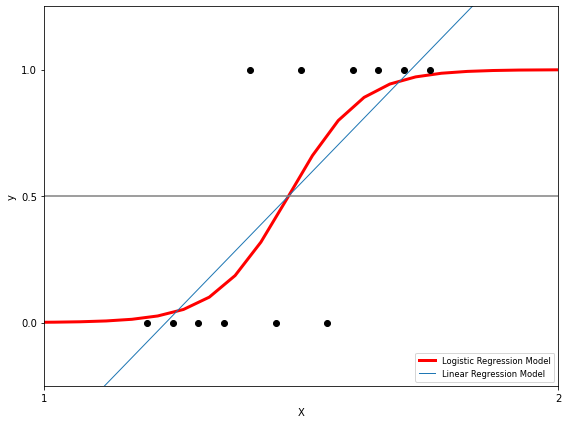

In [16]:
# Data 
X = np.array([1.2, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75])
Y = np.array([0, 0, 0, 0, 1, 0 , 1, 0, 1, 1, 1, 1])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(1, 3))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(1, 2)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

### Optimizing with Least Squares:  

$$
\begin{align}
&(x_n, y_n) : \text{$n$ th learning data} \\
&x_n = (x_n 1)^T : \text{vector of $x_n$ with added dimension} \\
&w = (w_1 w_2) ^T : \text{parameters} \\
&\hat{y_n} = \frac{1}{1 + \exp(-w^Tx)} : \text{prediction} \\
&e_n^2 = \frac{1}{2}(\hat{y_n} - y_n)^2 = \frac{1}{2}\left(\frac{1}{1 + \exp(-w^Tx)} - y_n\right)^2  \\
&E = \frac{1}{2}\sum^N_{n=1}(\hat{y_n} - y_n)^2 = \frac{1}{2}\sum^N_{n=1}\left(\frac{1}{1 + \exp(-w^Tx)} - y_n\right)^2 
\end{align}
$$

The objective function is the total error $E$, and we want to differentiate this to minimize it. However, for logistic regressions, we do not find an analytical solution. Thus, we must approximate through recursion.  

*The Gradient Method*:  
* Feed an approximate solution
* Use gradient of approximation 
* gradually improve solution  

eg. gradient descent, conjugate gradient method, newton method (see DSGE lecture notes)  


*Logistic Regression:*  
* On-line learning: Renew parameter per sample data  
$$w_{t+1} = w_{t} - \alpha \underbrace{\frac{\partial e_n^2}{\partial w}}_{\text{individual error}}$$

* Batch learning: Take entire sample data to renew parameter  
$$w_{t+1} = w_{t} - \alpha \underbrace{\frac{\partial E}{\partial w}}_{\text{whole error}}$$

0 [ 1.43783311 -0.03784065] 2.1404825444950126
100 [  9.07769011 -12.5690097 ] 1.3199699245079177
200 [ 10.78378647 -15.3412662 ] 1.2484806664784043
300 [ 11.50610975 -16.53500812] 1.2309185680995305
400 [ 11.83853847 -17.13958429] 1.2214102019429152
500 [ 11.98496148 -17.4501414 ] 1.2159660465067648
600 [ 12.0337503  -17.59816378] 1.2127664241972065
700 [ 12.02706099 -17.6478416 ] 1.2108619034059953
800 [ 11.98712292 -17.634458  ] 1.2096924703832164
900 [ 11.92714721 -17.5801249 ] 1.2089273212739324
1000 [ 11.855803   -17.50006958] 1.208380559118402
1100 [ 11.77907079 -17.40519746] 1.207953734283415
1200 [ 11.70110282 -17.30331844] 1.2075975177614213
1300 [ 11.62471681 -17.19990578] 1.2072882947544463
1400 [ 11.5517392  -17.09866141] 1.2070150015160084
1500 [ 11.48326715 -17.00196501] 1.206772229906716
1600 [ 11.41987302 -16.91123111] 1.2065568583940125
1700 [ 11.36176228 -16.82718755] 1.2063665404930557
1800 [ 11.30889298 -16.75008731] 1.206199111814191
1900 [ 11.26106403 -16.6798663

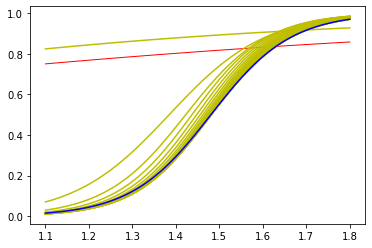

In [24]:
# Code example  
def sigm(z):
    """sigmoid function"""
    return 1/(1+np.exp(-z))

trainingData = np.array([[1.20, 0], [1.25, 0], [1.30, 0], [1.35, 0], [1.40, 1], [1.45, 0],
                         [1.50, 1], [1.55, 0], [1.60, 1], [1.70, 1], [1.75, 1]])
N, nd = trainingData.shape # N: samples, nd : dimension (number of variables, 2)
true = trainingData[:,1] # true values of y
D = cp.copy(trainingData)
D[:, nd - 1] = np.ones(N) # Data matrix X (get rid of y)
th = 1.0e-7 # tolerated threshold for error
alpha = 5.0 # learning rate
alpDec = 0.9999 # parameter for alpha decay, alpha shrinks as iteration progresses

nPlot = 100 # plot resolution
pltXaxis = np.linspace(1.1, 1.8, nPlot) # x-data for plot
xx = np.ones((nPlot, nd)) # data for plot
xx[:,0] = pltXaxis # change first parameter to x-data 

w = np.array([1.0, 0.0]) # initial model parameters (sigmoid function)
plt.plot(pltXaxis, sigm(xx.dot(w)), color="r", linewidth=1) # xx.dot(w) = dot product of xx and w
# xx.shape = 100 * 2, w.shape = 2, , xx.dot(w).shape = 100 * 1, w reshaped to 2 * 1 array during multiplication

# Actual model estimation  
errPrv = 10.0
for i in range(100000):
    for j in range(N):
        yhatj = sigm(D[j,:].dot(w))
        grad = (yhatj - true[j])*yhatj*(1-yhatj)*D[j,:]
        w = w - alpha * grad
        alpha = alpha * alpDec
    estimate = sigm(D.dot(w))
    errNew = np.sqrt((true - estimate).dot((true - estimate)))
    if abs(errNew - errPrv) < th: 
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "b") # converged model in blue
        break
    errPrv = errNew
    
    if i % 100 == 0:
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "y")
        print(i, w, errNew)

### Optimizing with Cross-Entropy  
Used widely for classification problems 
$$
\begin{align*}
&(x_n, y_n) : \text{$n$ th learning data} \\
&x_n = (x_n 1)^T : \text{vector of $x_n$ with added dimension} \\
&\mathbf{w} = (w_1 w_2) ^T : \text{parameters} \\
&\hat{y_n} = \frac{1}{1 + \exp(-\mathbf{w}^T\mathbf{x})} : \text{prediction}
\end{align*}
$$
Denote the probability that the $n$th data $x_n$ belongs to class $0, 1$ as $p_0, p_1$.  
The estimated value of those values are $q_0, q_1$. 
Then, 
$$
\begin{align*}
&p_1 = y_n, \; p_0 = 1 - y_n \\
&q_1 = \hat{y_n} = \frac{1}{1 + \exp(-\mathbf{w}^T\mathbf{x})}, \; q_0 = 1 - \hat{y_n}
\end{align*}
$$
And cross-entropy can be defined as:
$$e_n = -\sum_{k = 0}^1 p_k \log q_k = -y_n\log \hat{y_n} - (1 - y_n) \log (1 - \hat{y_n})$$


Then, the gradient is 
$$
\begin{align*}
e_n &= -\sum_{k = 0}^1 p_k \log q_k = -y_n\log \hat{y_n} - (1 - y_n) \log (1 - \hat{y_n}) \\
&\implies \frac{\partial e_n}{\partial \mathbf{w}} = -y_n \frac{1}{\hat{y_n}}\frac{\partial \hat{y_n}}{\partial \mathbf{w}} - (1 - y_n) \frac{1}{1-\hat{y_n}}\left(-\frac{\partial \hat{y_n}}{\partial \mathbf{w}}\right) \dots (1) \\
\hat{y_n} &= \frac{1}{1 + \exp (-\mathbf{w}^T \mathbf{x})} \\
&\implies \frac{\partial \hat{y_n}}{\partial \mathbf{w}} = \hat{y_n}(1 - \hat{y_n})\mathbf{x} \dots (2)
\end{align*}
$$

Now plug $(2)$ into $(1)$ to get 
$$\begin{align*}
\frac{\partial e_n}{\partial \mathbf{w}} &= (\hat{y_n} - y_n) \mathbf{x} \\
\implies \mathbf{w}_{new} &= \mathbf{w}_{prv} - \alpha \frac{\partial e_n}{\partial \mathbf{w}}
\end{align*}$$

In [ ]:
# For code, just change the main part of the code above 
pltData = sigm(xx.dot(w))
plt.plot(pltXaxis,pltData,color="r",linewidth = 1)

for i in range(100000):
    for j in range(N):
        yhatj = sigm(D[j,:].dot(w))
        grad = (yhatj - true[j])*(D[j,:])
        w = w - alpha * grad
        alpha = alpha + alpDec
    
    estmt = sigm(D.dot(w))
    errNew = -true.dot(np.log(estmt)) - (1 - true).dot(np.log(1-estmt))
    if abs(errNew - errPrv) < th: 
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "b") # converged model in blue
        break
    errPrv = errNew
    if i % 100 == 0:
        plt.plot(pltXaxis, pltData, color = "y")
        print(i, w, errNew)
    
print(i, w, errNew, alpha)
plt.ylim(-0.2, 1.2)
plt.hlines([0, 1], 1.1, 1.8, linestyles="dashed")
plt.plot(trainingData[:,0], true, "ro", markersize=10)
plt.show()
